<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) 

Project 3 is all about modelling exploring this data and modeling interesting relationships with regression. 


---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

** Feel free to include any other datasets from the San Francisco data if you think there is relevance or if it could be useful for your analysis.**


**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


In [52]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Use the San Francisco assessor dataset and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.(This is totally upto you)
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [2]:
#I'm using the assessor dataset that has already been cleaned

In [3]:
sf_assessor = '/Users/lana/Desktop/Lana-DSI/datasets/sf_assessor_value/assessor_value_cleaned.csv'
sf_assessor = pd.read_csv(sf_assessor)

In [4]:
# # Read sf_assessor legend
# sf_assessor_key = '/Users/lana/Desktop/Lana-DSI/datasets/san_francisco/assessor_office/assessor_data_key.csv'
# sf_assessor_key = pd.read_csv(sf_assessor_key)
# sf_assessor_key

In [5]:
# del sf_assessor['neighborhood']
# del sf_assessor['property_class']
# del sf_assessor['zone']

sf_assessor.head()

,baths,beds,lot_depth,basement_area,front_ft,owner_pct,rooms,property_class,neighborhood,tax_rate,volume,sqft,stories,year_recorded,year_built,zone,value
0,2,2,0.0,0.0,0.0,1.00000,5,Z,08E,1000.0,1,1419,0,2007,1907,RH3,1002840.0
1,2,2,0.0,0.0,0.0,1.00000,7,Z,08E,1000.0,1,1773,0,2007,1907,RH3,1433430.0
2,2,2,0.0,0.0,0.0,1.00000,5,Z,08E,1000.0,1,1242,0,2007,1995,C2,485599.0
3,1,0,0.0,0.0,0.0,0.33333,6,D,08E,1000.0,1,1820,1,2007,1927,RH3,120826.0
4,1,0,0.0,0.0,0.0,1.00000,4,D,08E,1000.0,1,1020,1,2007,1926,RH3,988380.0


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [6]:
sf_assessor_target = sf_assessor['value']
sf_assessor_predictors = sf_assessor[['baths', 'beds', 'rooms', 'sqft', 'stories']]

In [7]:
#how do investigate outliers? make a plot? probably, but plot what? and how?

In [8]:
ss = StandardScaler()
X = ss.fit_transform(sf_assessor_predictors)
linreg = LinearRegression()

In [9]:
#Train-Test-Split
X_train, X_test, Y_train, Y_test = train_test_split(sf_assessor_predictors, sf_assessor_target, 
                                                    test_size = 0.20, random_state = 1)

linreg.fit(X_train,Y_train)
Y_hat = linreg.predict(X_test)
mse = mean_squared_error(Y_test, Y_hat)
R_2 = linreg.score(X_train,Y_train)

print mse, R_2

115940659934.0 0.144148467224


In [10]:
#K-Fold Cross validation
linreg_scores = cross_val_score(linreg, X, sf_assessor_target, cv=10)

print linreg_scores
print np.mean(linreg_scores)

[ 0.11165361  0.11951752  0.12037194  0.14388644  0.06903712  0.15110586
  0.15706802  0.15925054  0.16745558  0.13833049]
0.13376771302


In [11]:
#What does each result means? How did it become like this? how do I plot it?
#I don't know what I'm doing. I feel like i'm just throwing different things at it and hope for the best.

In [12]:
#go though lab, what is it taking, how are we using cross validation
#what is cross validation
#google search code examples for linear regression.
#skilearn for cross_val_score and linear regression


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

In [13]:
# I don't understand my results and what it means!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine Crime and Fire incidents datasets from the  San Francisco data. Build a Linear regression model to predict number of fire incidents. What are the most significant predictors?

### Evaluate the model with regularized regression.

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**


- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. 
- Report on which model is best after performing regularization, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [14]:
sf_fire_incidents = '/Users/lana/Desktop/Lana-DSI/datasets/san_francisco/fire_data/fire_incidents.csv'
sf_fire_incidents = pd.read_csv(sf_fire_incidents)
sf_crime_incidents = '/Users/lana/Desktop/Lana-DSI/datasets/san_francisco/sf_crime/sfpd_incidents_from2003.csv'
sf_crime_incidents = pd.read_csv(sf_crime_incidents)

/Users/lana/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,12,19,44,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
print sf_fire_incidents.head()
print sf_crime_incidents.head()

   Incident Number  Exposure Number               Address Incident Date  \
0          9030109                0         310 Colon Av.    04/12/2009   
1         13067402                0        20 Lansdale Av    07/18/2013   
2         12044490                0  7th St. / Folsom St.    05/13/2012   
3         13033326                0       2799 Pacific Av    04/09/2013   
4         11101416                0   Polk St. / Pine St.    11/01/2011   

   Call Number              Alarm DtTm            Arrival DtTm  \
0     91020273  04/12/2009 06:09:13 PM  04/12/2009 06:13:45 PM   
1    131990117  07/18/2013 10:32:03 AM  07/18/2013 10:37:15 AM   
2    121340051  05/13/2012 03:55:37 AM  05/13/2012 04:01:57 AM   
3    130990286  04/09/2013 04:34:07 PM  04/09/2013 04:39:31 PM   
4    113050357  11/01/2011 06:07:45 PM  11/01/2011 06:10:17 PM   

               Close DtTm City  Zipcode               ...                 \
0  04/12/2009 07:23:13 PM   SF      NaN               ...                  


In [16]:
print sf_fire_incidents.columns
print sf_crime_incidents.columns

Index([u'Incident Number', u'Exposure Number', u'Address', u'Incident Date',
       u'Call Number', u'Alarm DtTm', u'Arrival DtTm', u'Close DtTm', u'City',
       u'Zipcode', u'Battalion', u'Station Area', u'Box', u'Suppression Units',
       u'Suppression Personnel', u'EMS Units', u'EMS Personnel',
       u'Other Units', u'Other Personnel', u'First Unit On Scene',
       u'Estimated Property Loss', u'Estimated Contents Loss',
       u'Fire Fatalities', u'Fire Injuries', u'Civilian Fatalities',
       u'Civilian Injuries', u'Number of Alarms', u'Primary Situation',
       u'Mutual Aid', u'Action Taken Primary', u'Action Taken Secondary',
       u'Action Taken Other', u'Detector Alerted Occupants', u'Property Use',
       u'Area of Fire Origin', u'Ignition Cause', u'Ignition Factor Primary',
       u'Ignition Factor Secondary', u'Heat Source', u'Item First Ignited',
       u'Human Factors Associated with Ignition', u'Structure Type',
       u'Structure Status', u'Floor of Fire Origin', 

In [17]:
sf_crime_incidents['Category'].unique()

array(['WARRANTS', 'MISSING PERSON', 'ROBBERY', 'OTHER OFFENSES',
       'ASSAULT', 'SUICIDE', 'NON-CRIMINAL', 'LARCENY/THEFT', 'ARSON',
       'WEAPON LAWS', 'VEHICLE THEFT', 'VANDALISM', 'BURGLARY',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'LIQUOR LAWS', 'SUSPICIOUS OCC',
       'RECOVERED VEHICLE', 'FRAUD', 'STOLEN PROPERTY',
       'DISORDERLY CONDUCT', 'SECONDARY CODES', 'TRESPASS',
       'SEX OFFENSES, FORCIBLE', 'FORGERY/COUNTERFEITING', 'EMBEZZLEMENT',
       'RUNAWAY', 'PROSTITUTION', 'KIDNAPPING', 'GAMBLING',
       'DRIVING UNDER THE INFLUENCE', 'LOITERING', 'BRIBERY', 'EXTORTION',
       'FAMILY OFFENSES', 'BAD CHECKS', 'SEX OFFENSES, NON FORCIBLE',
       'PORNOGRAPHY/OBSCENE MAT', 'TREA'], dtype=object)

In [18]:
#What I am trying to look for in these datasets? What do I even want from this? 
#I don't know what I want from this dataset!
#How can I clean them when I don't even know what I am trying to find?  

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another analysis using the San Francisco Parks data to predict Park scores

---

1. Combining multiple sources of park data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.


In [19]:
sf_parks_scores = '/Users/lana/Desktop/Lana-DSI/datasets/san_francisco/parks/park_scores.csv'
sf_parks_info = '/Users/lana/Desktop/Lana-DSI/datasets/san_francisco/parks/park_info.csv'
sf_parks_scores = pd.read_csv(sf_parks_scores)
sf_parks_info = pd.read_csv(sf_parks_info)

In [20]:
#give ParkType a number
#give ParkServiceArea a number
#needed columns - Zipcode, Acreage, SupDist
sf_parks = pd.merge(sf_parks_info, sf_parks_scores, on='ParkID')
print sf_parks.shape
print sf_parks.info()
sf_parks.head()

(5483, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5483 entries, 0 to 5482
Data columns (total 16 columns):
ParkName           5483 non-null object
ParkType           5483 non-null object
ParkServiceArea    5483 non-null object
PSAManager         5483 non-null object
email              5483 non-null object
Number             5483 non-null object
Zipcode            5276 non-null float64
Acreage            5483 non-null float64
SupDist            5483 non-null float64
ParkID             5483 non-null float64
Location 1         4969 non-null object
Lat                0 non-null float64
PSA                5483 non-null object
Park               5483 non-null object
FQ                 5483 non-null object
Score              5482 non-null float64
dtypes: float64(6), object(10)
memory usage: 728.2+ KB
None


,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat,PSA,Park,FQ,Score
0,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,PSA1,10th Avenue-Clement Mini Park,FY05Q4,0.655
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,PSA1,10th Avenue-Clement Mini Park,FY06Q2,0.854
2,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,PSA1,10th Avenue-Clement Mini Park,FY06Q4,0.673
3,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,PSA1,10th Avenue-Clement Mini Park,FY07Q2,0.378
4,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,PSA1,10th Avenue-Clement Mini Park,FY09Q4,0.971


In [21]:
print sf_parks.ParkType.unique()
print sf_parks.ParkServiceArea.unique()
print sf_parks.PSA.unique()
print sf_parks.columns[sf_parks.isnull().any()].tolist()
sf_parks.shape

['Mini Park' 'Neighborhood Park or Playground' 'Regional Park'
 'Civic Plaza or Square' 'Parkway']
['PSA 1' 'PSA 6' 'PSA 5' 'PSA 3' 'PSA 2' 'PSA 4' 'Golden Gate Park']
['PSA1' 'PSA6' 'PSA5' 'PSA3' 'PSA2' 'PSA4' 'GGP']
['Zipcode', 'Location 1', 'Lat', 'Score']


(5483, 16)

In [22]:
del sf_parks['Zipcode'] # can't use Zipcode because Golden Gate Park does not have a zipcode
del sf_parks['Location 1']
del sf_parks['Lat']

In [23]:
# delete these cells
# sf_parks[sf_parks.Score.isnull()]
sf_parks = sf_parks.dropna()

In [24]:
park_type_dict = {'Mini Park': 1, 
                  'Neighborhood Park or Playground': 2, 
                  'Regional Park': 3,
                  'Civic Plaza or Square': 4,
                  'Parkway': 5}
park_service_area = {'PSA 1': 1,
                     'PSA 6': 6,
                     'PSA 5': 5,
                     'PSA 3': 3,
                     'PSA 2': 2,
                     'PSA 4': 4,
                     'Golden Gate Park': 0}
FY = {'FY05': 2005,
      'FY06': 2006,
      'FY07': 2007,
      'FY08': 2008,
      'FY09': 2009,
      'FY10': 2010,
      'FY11': 2011,
      'FY12': 2012,
      'FY13': 2013,
      'FY14': 2014,
      'FY15': 2015}

sf_parks['ParkType'] = sf_parks['ParkType'].map(park_type_dict)
sf_parks['ParkServiceArea'] = sf_parks['ParkServiceArea'].map(park_service_area)

In [25]:
#sf_parks['Fiscal Year'] = sf_parks['FQ'].map(lambda x: x. start_with(FY), sf_parks['FQ'])
#use if else to create year column
def fiscal_year(x):
    if '05' in x:
        return 2005
    elif '06' in x:
        return 2006
    elif '07' in x:
        return 2007
    elif '08' in x:
        return 2008
    elif '09' in x:
        return 2009
    elif '10' in x:
        return 2010
    elif '11' in x:
        return 2011
    elif '12' in x:
        return 2012
    elif '13' in x:
        return 2013
    elif '14' in x:
        return 2014
    elif '15' in x:
        return 2015
    
sf_parks['FiscalYear'] = sf_parks.FQ.map(fiscal_year)

In [26]:
def quarter(x):
    if 'Q1' in x:
        return 1
    elif 'Q2' in x:
        return 2
    elif 'Q3' in x:
        return 3
    elif 'Q4' in x:
        return 4
    
sf_parks['Quarter'] = sf_parks.FQ.apply(quarter)

In [27]:
if 'FY05' in sf_parks.FQ[0]:
    print 'here'

here


In [28]:
sf_parks.head()

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Acreage,SupDist,ParkID,PSA,Park,FQ,Score,FiscalYear,Quarter
0,10TH AVE/CLEMENT MINI PARK,1,1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,0.66,1.0,156.0,PSA1,10th Avenue-Clement Mini Park,FY05Q4,0.655,2005,4
1,10TH AVE/CLEMENT MINI PARK,1,1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,0.66,1.0,156.0,PSA1,10th Avenue-Clement Mini Park,FY06Q2,0.854,2006,2
2,10TH AVE/CLEMENT MINI PARK,1,1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,0.66,1.0,156.0,PSA1,10th Avenue-Clement Mini Park,FY06Q4,0.673,2006,4
3,10TH AVE/CLEMENT MINI PARK,1,1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,0.66,1.0,156.0,PSA1,10th Avenue-Clement Mini Park,FY07Q2,0.378,2007,2
4,10TH AVE/CLEMENT MINI PARK,1,1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,0.66,1.0,156.0,PSA1,10th Avenue-Clement Mini Park,FY09Q4,0.971,2009,4


In [29]:
print sf_parks.ParkType.unique()
print sf_parks.ParkServiceArea.unique()

[1 2 3 4 5]
[1 6 5 3 2 4 0]


In [30]:
sf_parks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5482 entries, 0 to 5482
Data columns (total 15 columns):
ParkName           5482 non-null object
ParkType           5482 non-null int64
ParkServiceArea    5482 non-null int64
PSAManager         5482 non-null object
email              5482 non-null object
Number             5482 non-null object
Acreage            5482 non-null float64
SupDist            5482 non-null float64
ParkID             5482 non-null float64
PSA                5482 non-null object
Park               5482 non-null object
FQ                 5482 non-null object
Score              5482 non-null float64
FiscalYear         5482 non-null int64
Quarter            5482 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 685.2+ KB


In [31]:
sf_park_target = sf_parks['Score']
sf_park_predictors = sf_parks[['ParkType', 'ParkServiceArea', 'Acreage', 'SupDist', 'FiscalYear']]

In [32]:
ss = StandardScaler()
X = ss.fit_transform(sf_park_predictors)

In [33]:
linreg_scores = cross_val_score(linreg, X, sf_park_target, cv=10)

print linreg_scores
print np.mean(linreg_scores)

[ 0.06724564  0.07027528  0.08595674 -0.08202914  0.09509767  0.11354523
  0.0899665  -0.000885    0.09087665  0.02691363]
0.0556963204858


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Use a model from any of the previous questions above of your choice and construct a regularized regression model . Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco Crime data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here? 
 
- How would you measure the success of such a program?
  
- Rephrase this question to be unbiased:
    ** Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree? ** 
    
    ** Do you agree with this statement: "Many people have said that there is a need for stricter laws on dangerous weapons"? **

In [34]:
# People are only invite people they know. People tends to be friends with people that are similar to them.
# I would measure success based on orders made after the free orders, so the person will need to make repeats paid order after they try out the app with the free meal.

In [35]:
#Answer:
#Do you agree with this statement: "Many people have said that there is a need for stricter laws on dangerous weapons"?

# Notes:
# "Many people have said that" makes it bias in that there is a preconceived idea
# "stricter laws" is subjective because you are the "-er" is a comparson and make it into a leading question.
# "dangerous weapons" can also be subjective because it relies on a preconceived idea on what weapons are dangerous

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data from the following website: 
http://assets.datacamp.com/blog_assets/chol.txt'


- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?

If national average weight is 85 pounds, is our weight average significantly different?

    By looking at the results of the mean, std and median of age, it looks like our model is significantly different, the main reason is that the national average is one Standard deviation from the mean of our model
    We will need to do a z-test or t-test to know how significantly different our model is compared the national average.

In [36]:
chol = pd.read_table('http://assets.datacamp.com/blog_assets/chol.txt', sep= ' ')
chol.head()

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
0,20,176,77,195,nonsmo,b,alive
1,53,167,56,250,sigare,o,dead
2,44,170,80,304,sigare,a,dead
3,37,173,89,178,nonsmo,o,alive
4,26,170,71,206,sigare,o,alive


In [37]:
chol.describe()

,AGE,HEIGHT,WEIGHT,CHOL
count,200.000000,200.00000,200.000000,200.000000
mean,35.715000,172.35000,75.885000,233.600000
std,9.604426,6.77399,10.442076,44.766732
min,18.000000,156.00000,53.000000,107.000000
25%,28.750000,168.00000,68.750000,204.000000
50%,37.000000,172.00000,75.000000,232.000000
75%,42.000000,176.00000,82.000000,259.000000
max,58.000000,191.00000,110.000000,455.000000


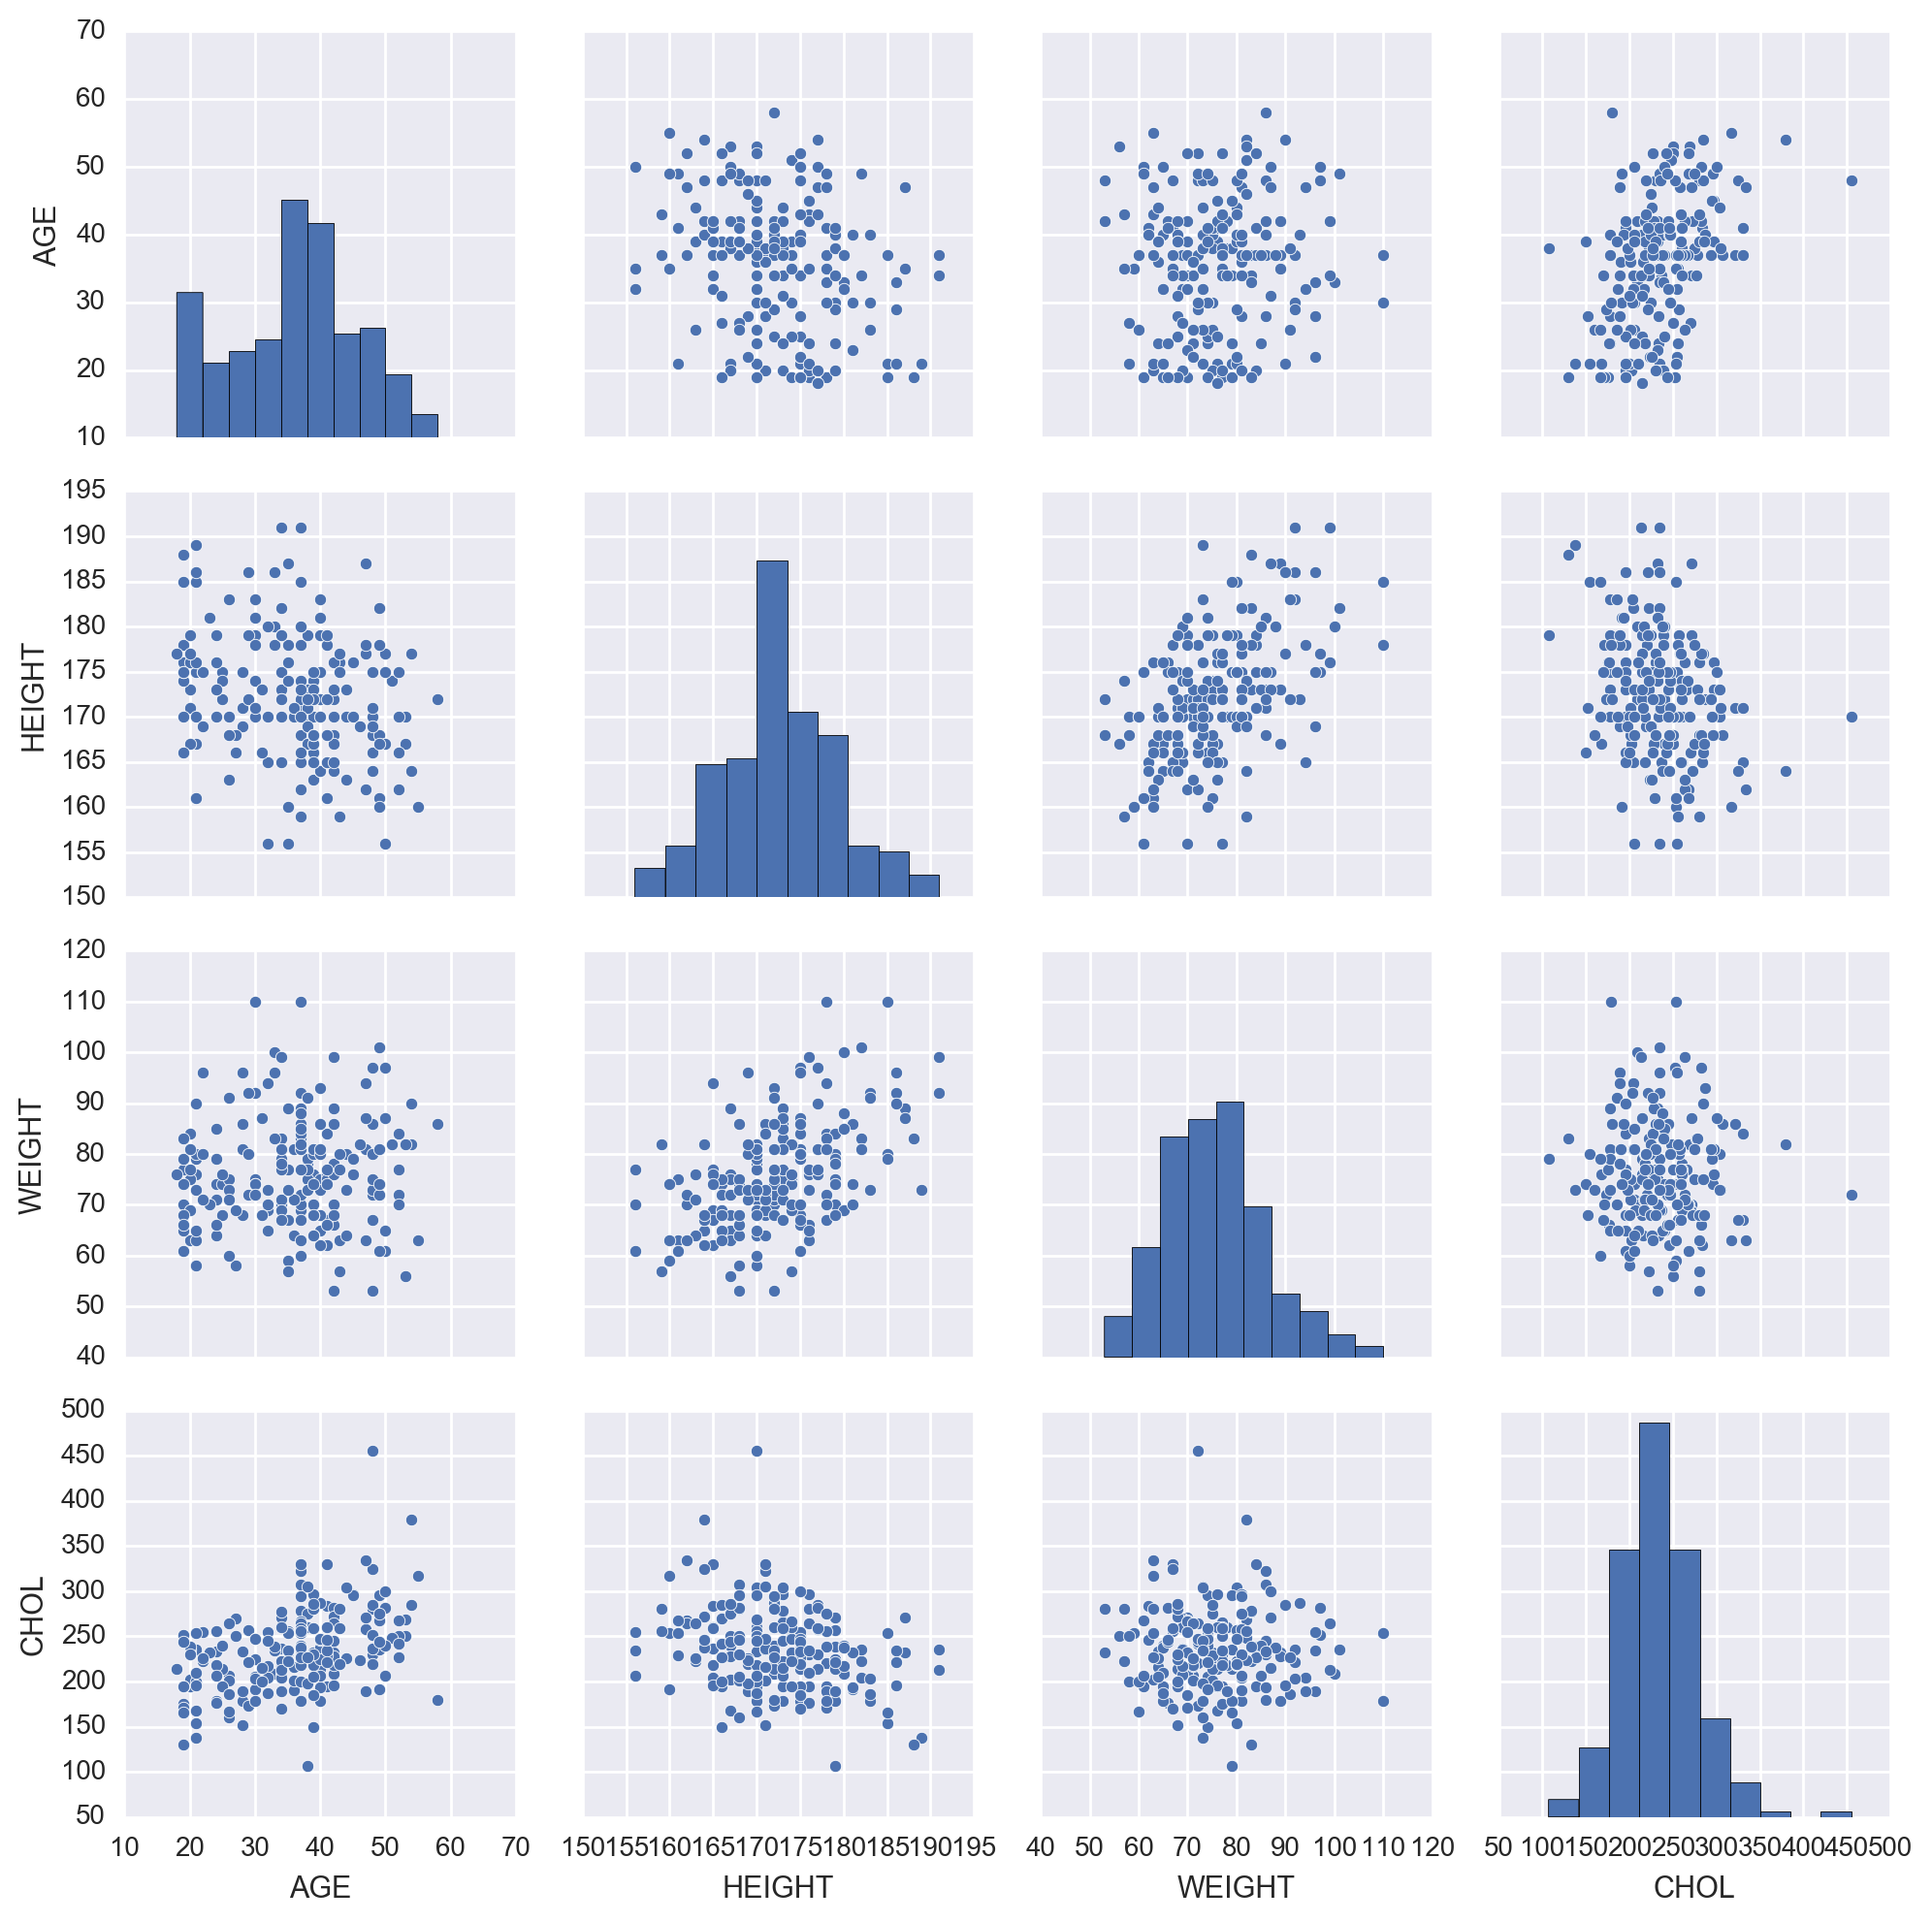

In [56]:
sns.pairplot(chol);

             AGE    HEIGHT    WEIGHT      CHOL
AGE     1.000000 -0.274894  0.053034  0.454691
HEIGHT -0.274894  1.000000  0.491970 -0.287539
WEIGHT  0.053034  0.491970  1.000000 -0.034337
CHOL    0.454691 -0.287539 -0.034337  1.000000


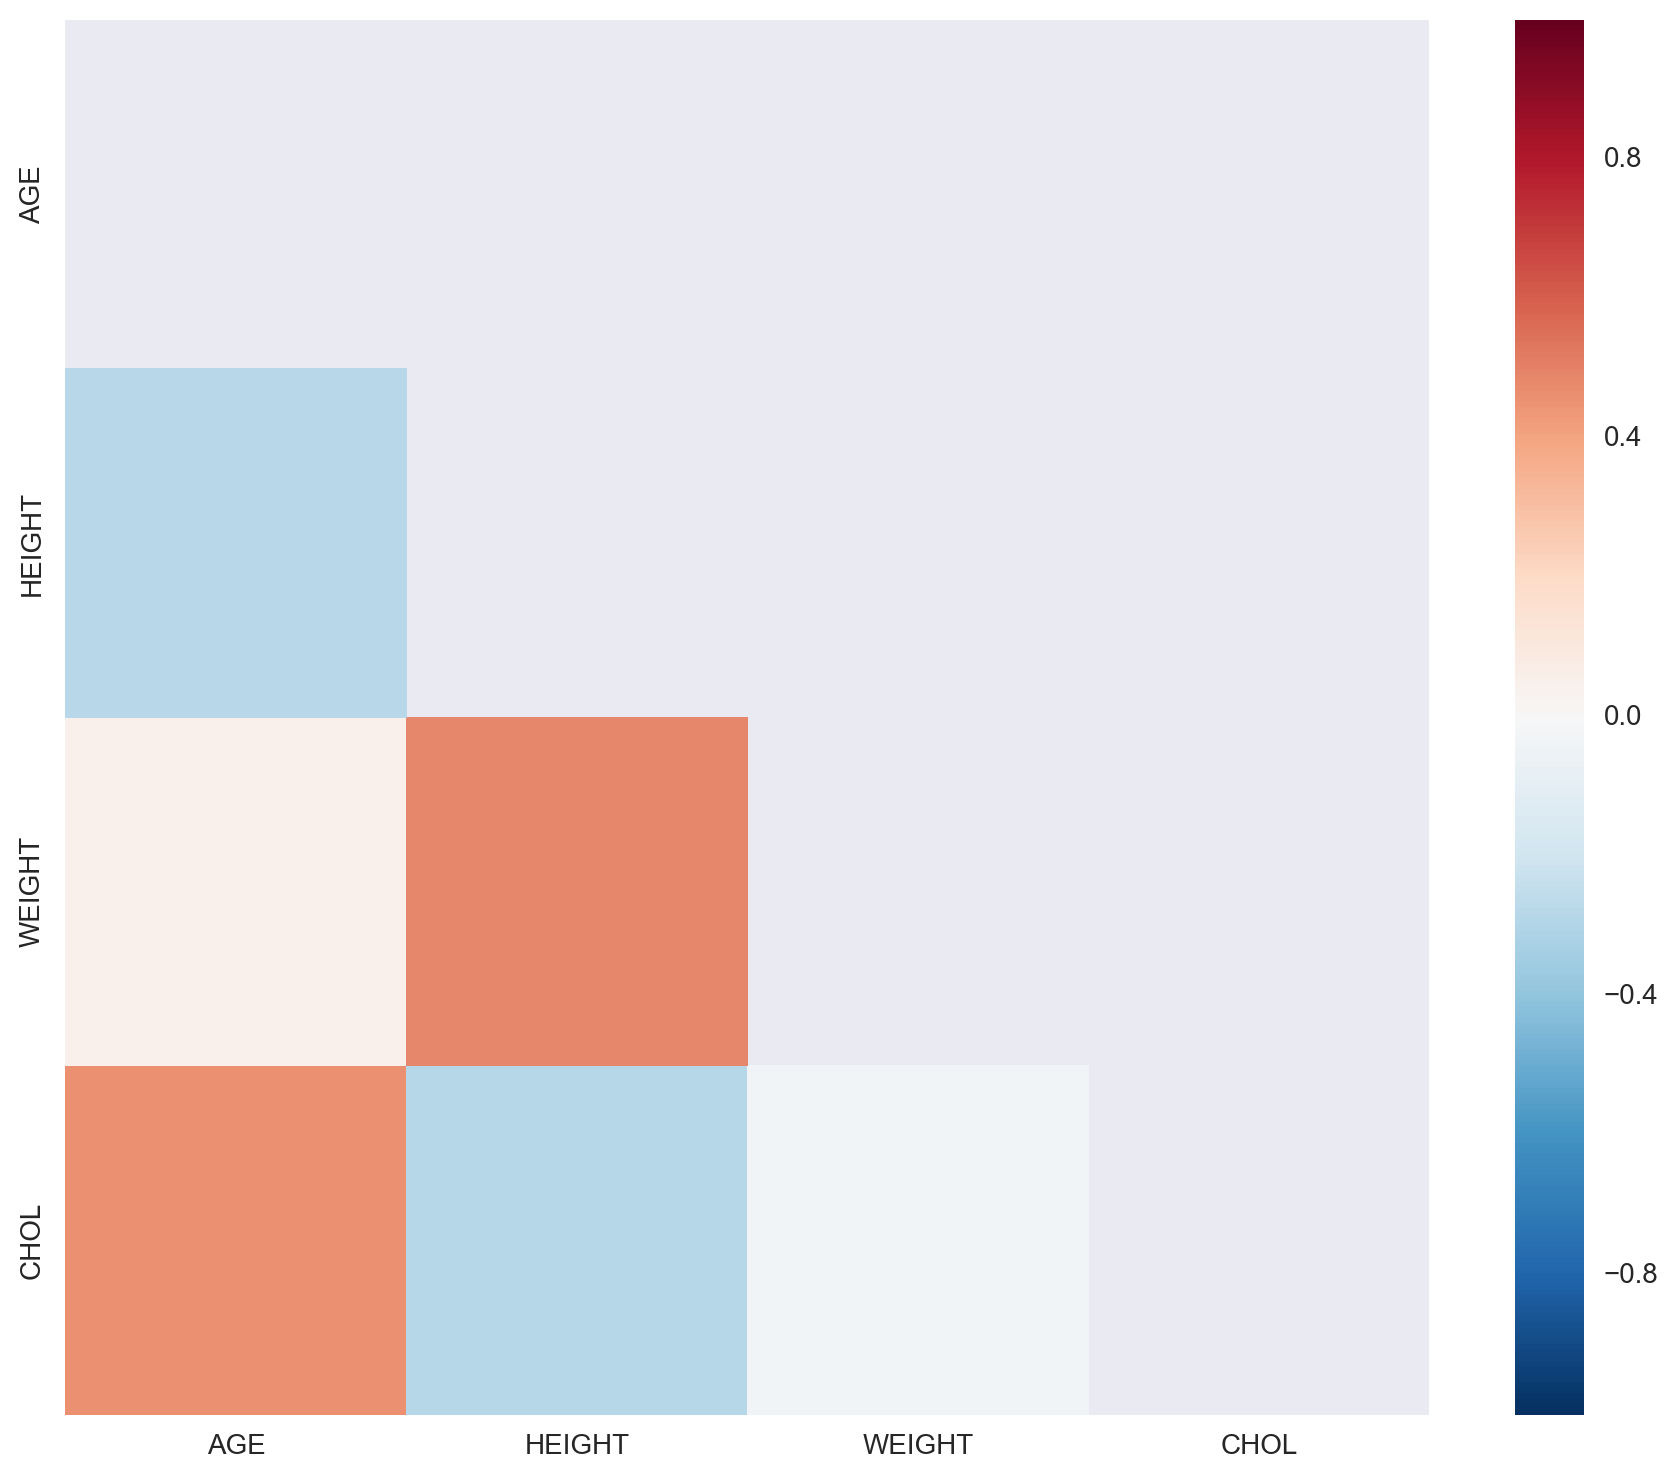

In [57]:
# Compute the correlation matrix
corr = chol.corr()
print corr
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask);